In [14]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import zipfile

%pylab inline

if os.getenv ('PUI2016') is None:
        print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
        print ("Must set env variable PUIDATA")
        
import os
import json

Populating the interactive namespace from numpy and matplotlib


In [15]:
datestring = '201507'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df['date'] = pd.to_datetime(df['starttime'])
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32.9M  100 32.9M    0     0  24.2M      0  0:00:01  0:00:01 --:--:-- 27.5M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,2015-07-01 00:00:03
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,2015-07-01 00:00:06
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1,2015-07-01 00:00:17
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1,2015-07-01 00:00:23
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1,2015-07-01 00:00:44


In [16]:
df["age"] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [17]:
df['birth year'].dropna(inplace= True)

In [18]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,age
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,2015-07-01 00:00:03,45.0
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,2015-07-01 00:00:06,31.0
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1,2015-07-01 00:00:17,23.0
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1,2015-07-01 00:00:23,25.0
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1,2015-07-01 00:00:44,27.0


In [19]:
df.drop([u'tripduration', u'starttime', u'stoptime', u'start station id', u'start station name', u'start station latitude',
        u'start station longitude', u'end station id', u'end station name', u'end station latitude', u'end station longitude',
        u'bikeid', u'usertype', u'birth year', u'gender', u'date'], axis=1, inplace=1)

In [20]:
df.head()

,age
0,45.0
1,31.0
2,23.0
3,25.0
4,27.0


In [21]:
df.describe()

,age
count,905311.000000
mean,38.351615
std,11.440139
min,16.000000
25%,NaN
50%,NaN
75%,NaN
max,130.000000


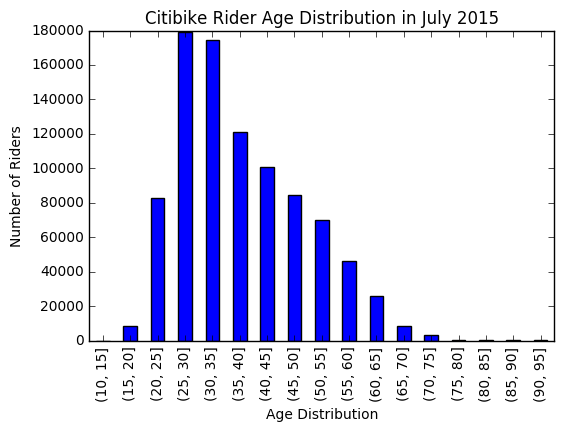

In [33]:
bins = np.arange(10, 99 ,5)
ax = df.age.groupby(pd.cut(df.age,bins)).agg([count_nonzero]).plot(kind='bar',legend=False)
ax.set_title("Citibike Rider Age Distribution in July 2015")
pl.xlabel('Age Distribution')
pl.ylabel('Number of Riders')

In [35]:
#The figure above shows the age distribution of Citibike riders in July 2015.  Although it has some resemblance to a normal
#distribution, it is not so due to several factors - the mean age of riders is somewhat less than middle age (reasonable,
#as people are generally more physically active before reaching middle age, and that there is a minimum age restriction on
#Citibike usage.

In [47]:
#My first test used will be the KS test, testing both a normal and logistic distribution.  The null hypotheses are that the
#age distribution is identical to a normal distribution and that the age distribution is identical to a logistic distribution
#H_o: dist(age) = dist(normal) and dist(age) = dist(logistic).

In [36]:
import scipy.stats

In [40]:
df['age'].dropna(inplace= True)

In [41]:
print ( scipy.stats.kstest(df['age'], 'norm'))
print ( scipy.stats.kstest(df['age'], 'logistic'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.99999988746483792, pvalue=0.0)


In [52]:
#For both test results, we cannot reject the null hypotheses because the statistics generated (1 and 0.999) are not greater
#than the corresponding critical value with an alpha = 0.05 (1.36) <-- value obtained from
#(http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/).

In [49]:
#My second test used will be the Anderson-Darling test, testing both a normal and a logistic distribution.  The null hypotheses
#are that the sample of age data is drawn from a population that follows the normal distribution and that the sample of age data 
#is drawn from a population that follows the logistic distribution: H_o: P(sample) = P(normal) and P(sample) = P(logistic).

In [50]:
print ("Normal Distribution Comparison", scipy.stats.anderson(df['age'], dist='norm'))
print ("Logistic Distribution Comparison", scipy.stats.anderson(df['age'], dist='logistic'))

Normal Distribution Comparison AndersonResult(statistic=13805.856181447394, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Logistic Distribution Comparison AndersonResult(statistic=12772.358104872401, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


In [53]:
#For both test results, we can reject the null hypothesis since the statistics obtained are higher than the critical value.